# Econometria Aplicada

## Aula 6 - Introdução à séries temporais




João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

**Motivação**: \\

 Será que há diferença nas características do volume de vendas no comércio varejista no Brasil entre "Móveis e eletrodomésticos" e "Tecido, vestuário e calçado"?

### Pacotes

In [1]:
install.packages("rbcb")  # para obter os dados do SGS do Banco Central do Brasil

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘xts’




In [2]:
library(rbcb)

### Dados

In [3]:
cod <- c(  1522, # Índice volume de vendas no varejo - Móveis e eletrodomésticos - Brasil
           1509  # Índice volume de vendas no varejo - Tecido, vestuário e calçado - Brasil
            )

In [4]:
varejo  <- get_series( cod, as = "ts" )

In [5]:
dat <- data.frame( moveis = varejo$`1522`, calcado = varejo$`1509` )

Veja os primeiros 5 elementos do objeto 'dat':

In [ ]:
head( dat, 5 )

,moveis,calcado
,<dbl>,<dbl>
1,30.86,61.99
2,29.71,67.81
3,31.49,71.28
4,30.13,78.23
5,36.40,96.57


Adicione ao data frame 'dat' uma variável com o mês. Para isso, utilize a função 'time( objeto )', onde 'objeto é a série temporal cujo tempo você quer extrair. No nosso caso, será a varíavel 'dat$moveis':

In [ ]:
dat$mes = time( dat$moveis )

Veja os primeiros 5 elementos do objeto 'dat':

In [ ]:
head( dat, 5 )

,moveis,calcado,mes
,<dbl>,<dbl>,<dbl>
1,30.86,61.99,2000.000
2,29.71,67.81,2000.083
3,31.49,71.28,2000.167
4,30.13,78.23,2000.250
5,36.40,96.57,2000.333


Veja a estrutura dos dados:

In [ ]:
str( dat ) # estrutura dos dados

'data.frame':	279 obs. of  3 variables:
 $ moveis : Time-Series  from 2000 to 2023: 30.9 29.7 31.5 30.1 36.4 ...
 $ calcado: Time-Series  from 2000 to 2023: 62 67.8 71.3 78.2 96.6 ...
 $ mes    : Time-Series  from 2000 to 2023: 2000 2000 2000 2000 2000 ...


## Visualização dos dados

Faça um gráfico com a evolução mensal do Índice volume de vendas no varejo - Móveis e eletrodomésticos

In [ ]:
library(ggplot2)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


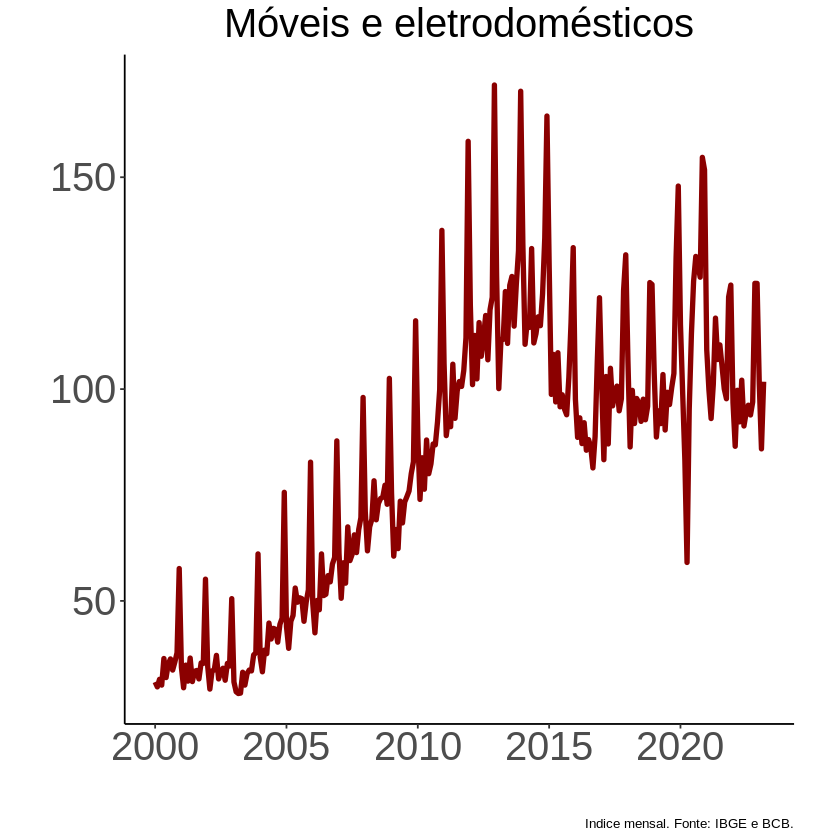

In [ ]:
ggplot( dat ) + geom_line(aes(x = mes, y =  moveis ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Móveis e eletrodomésticos" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

Faça um gráfico com a evolução mensal do Índice volume de vendas no varejo - Tecido, vestuário e calçado

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


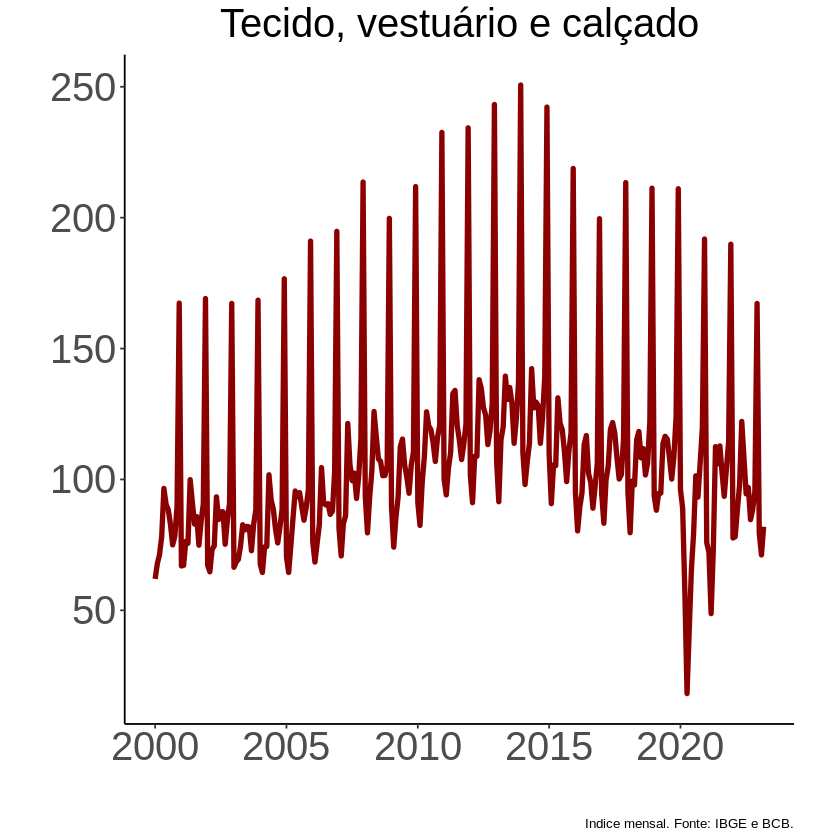

In [ ]:
ggplot( dat ) + geom_line(aes(x = mes, y =  calcado ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Tecido, vestuário e calçado" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

## Sazonalidade

In [ ]:
install.packages("forecast")  # para os gráficos de sazonalidade

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




In [ ]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Faça um gráfico para verificar os padrões sazonais mensais na série do Índice volume de vendas no varejo - Móveis e eletrodomésticos

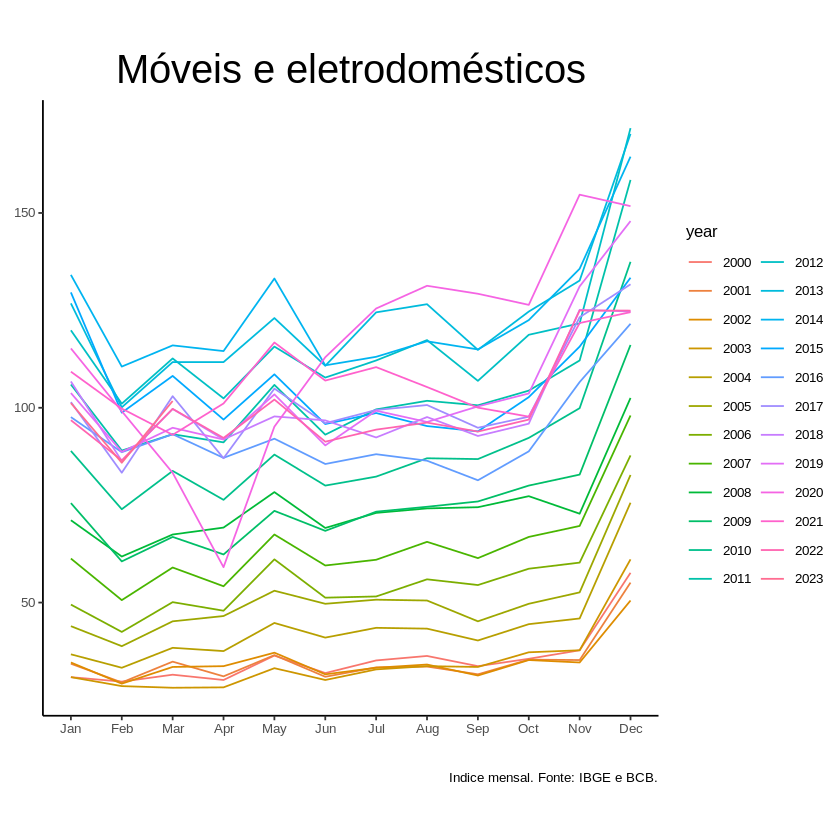

In [ ]:
ggseasonplot( dat$moveis ) +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Móveis e eletrodomésticos" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 16, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

Faça um gráfico para verificar os padrões sazonais mensais na série do Índice volume de vendas no varejo - Tecido, vestuário e calçado

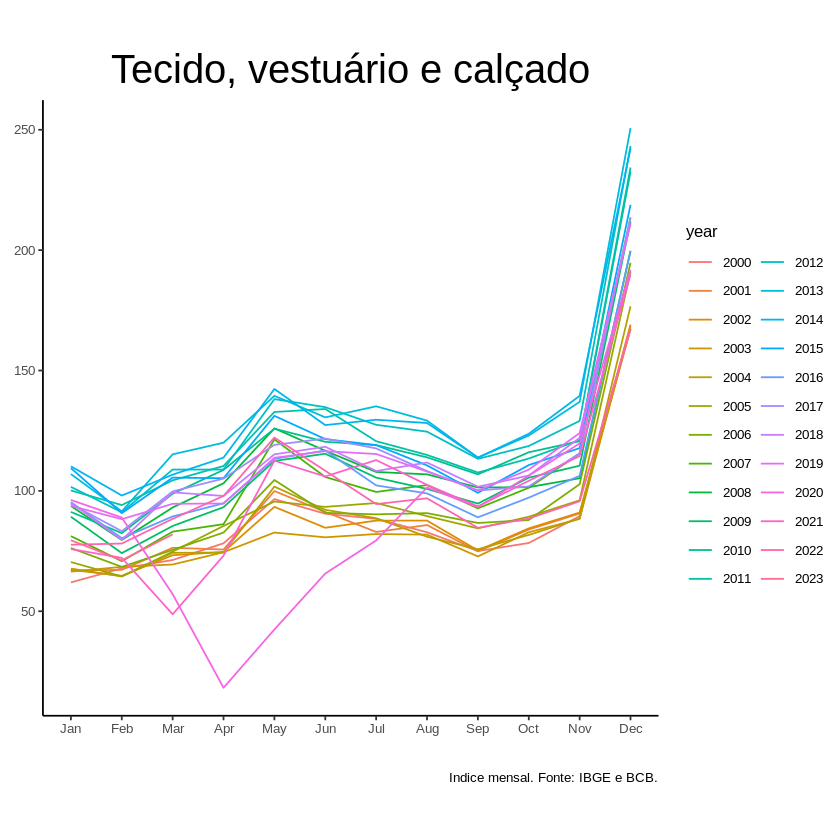

In [ ]:
ggseasonplot( dat$calcado ) +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Tecido, vestuário e calçado" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 16, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

## Funções de autocorrelação

Faça um gráfico com a função de autocorrelação do Índice volume de vendas no varejo - Móveis e eletrodomésticos

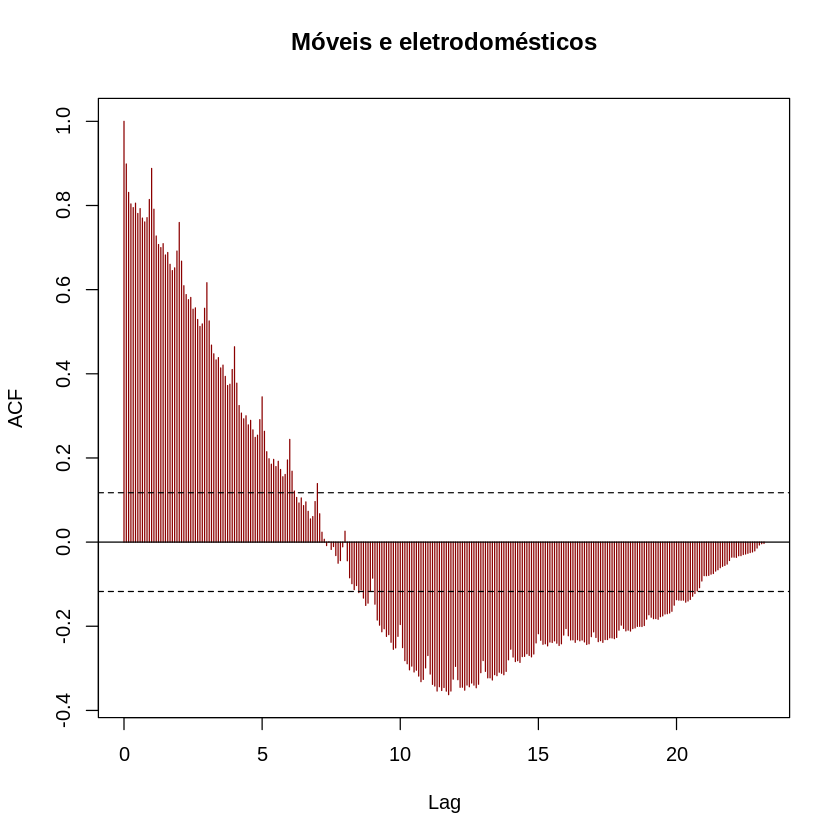

In [7]:
acf(dat$moveis, main = "Móveis e eletrodomésticos", col = "darkred", ci.col = "black", lag.max = length(dat$moveis) - 1)

Faça um gráfico com a função de autocorrelação do Índice volume de vendas no varejo - Tecido, vestuário e calçado

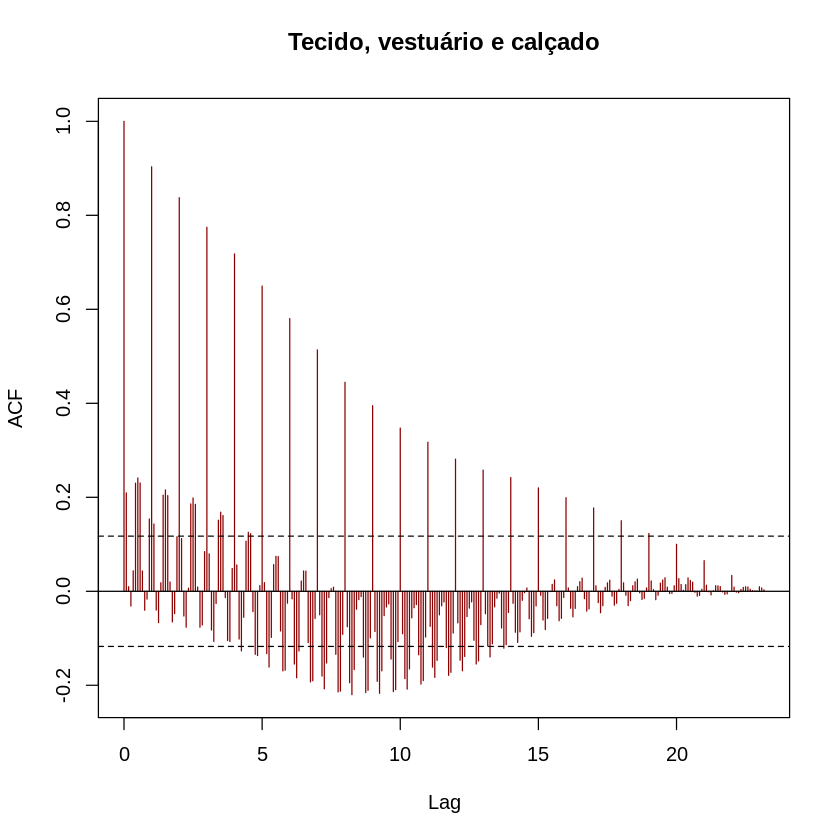

In [8]:
acf( dat$calcado, main = "Tecido, vestuário e calçado", col = "darkred", ci.col = "black", lag.max = length(dat$calcado) - 1)

Faça um gráfico com a função de autocorrelação parcial do Índice volume de vendas no varejo - Móveis e eletrodomésticos

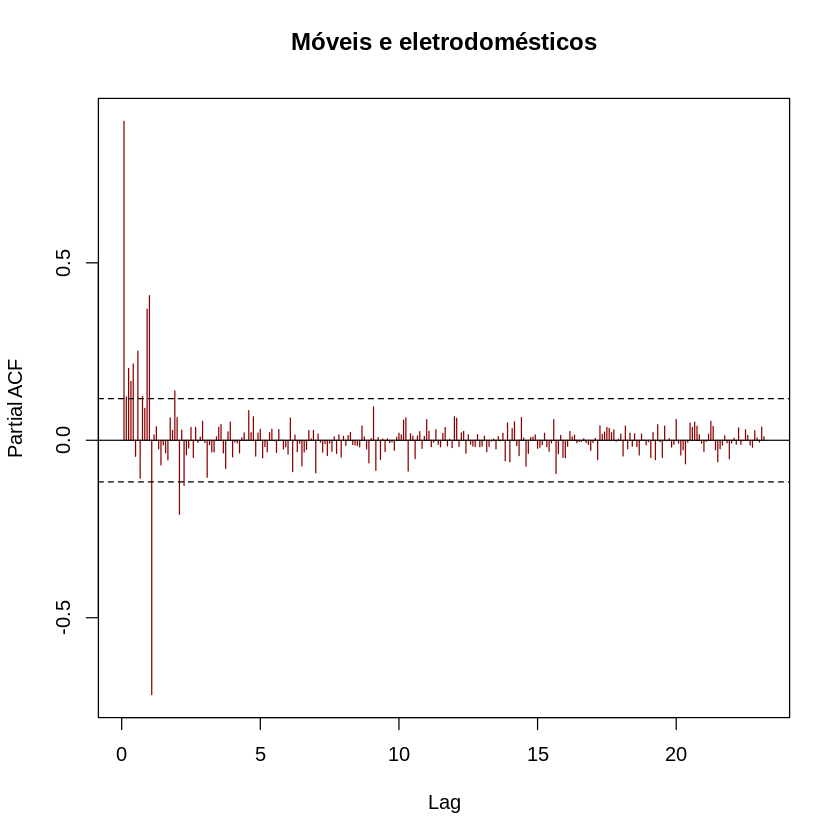

In [9]:
pacf( dat$moveis, main = "Móveis e eletrodomésticos", col = "darkred", ci.col = "black", lag.max = length(dat$moveis) - 1)

Faça um gráfico com a função de autocorrelação parcial do Índice volume de vendas no varejo - Tecido, vestuário e calçado

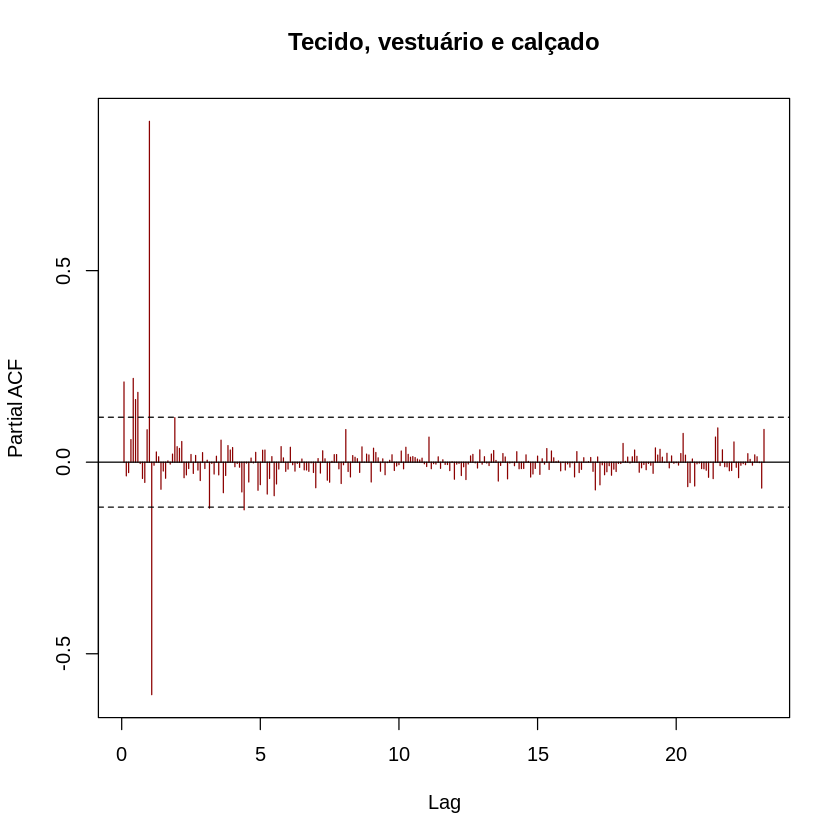

In [10]:
pacf(dat$calcado, main = "Tecido, vestuário e calçado", col = "darkred", ci.col = "black", lag.max = length(dat$calcado) - 1)

## Testes de raiz unitária

Faça um teste ADF de raiz unitária para a série do Índice volume de vendas no varejo - Móveis e eletrodomésticos.

In [ ]:
install.packages("urca")           # para os testes de raiz unitária

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(urca)

### ADF (Augmented-Dickey-Fuller)

$H_0$: possui raiz unitária

In [ ]:
summary( ur.df( dat$moveis, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.5864  -2.8127  -0.3951   2.5490  25.7389 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.27066    1.25309   1.812 0.071174 .  
z.lag.1      -0.02951    0.02662  -1.109 0.268540    
tt            0.00483    0.01068   0.452 0.651615    
z.diff.lag1  -0.17241    0.05247  -3.286 0.001162 ** 
z.diff.lag2  -0.20285    0.05232  -3.877 0.000135 ***
z.diff.lag3  -0.17979    0.05230  -3.437 0.000687 ***
z.diff.lag4  -0.20111    0.05242  -3.836 0.000158 ***
z.diff.lag5  -0.12986    0.05317  -2.442 0.015280 *  
z.diff.lag6  -0.16586    0.05270  -3.147 0.001848 ** 
z.diff.lag7  -0.13031    0.05190  -2.511 0.012681 *  
z.diff.lag8  -0.11767    0.05148  -2.286 0.023111 *  


Como interpretar?

* Primeiro (antes de fazer o teste!) temos que escolher o nível de significância (1%, 5% ou 10%).
* Depois, comparamos as estatísticas calculadas (value of test-statistics) com os valores críticos:
  * tau3: hipótese nula: raiz unitária.
  * phi2: hipótese nula: raiz unitária, sem tendência e sem drift.
  * phi3: hipótese nula: raiz unitária e sem tendência.

Faça um teste ADF de raiz unitária para a série do Índice volume de vendas no varejo - Tecido, vestuário e calçado.

In [ ]:
summary( ur.df( dat$calcado, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.745  -3.922  -0.059   4.444  53.853 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.974267   4.008232   1.740 0.083087 .  
z.lag.1      -0.063251   0.040938  -1.545 0.123600    
tt           -0.000862   0.007985  -0.108 0.914123    
z.diff.lag1  -0.199389   0.058781  -3.392 0.000806 ***
z.diff.lag2  -0.214365   0.056993  -3.761 0.000210 ***
z.diff.lag3  -0.219088   0.055925  -3.918 0.000115 ***
z.diff.lag4  -0.219123   0.055255  -3.966 9.55e-05 ***
z.diff.lag5  -0.198925   0.054693  -3.637 0.000335 ***
z.diff.lag6  -0.188171   0.053615  -3.510 0.000532 ***
z.diff.lag7  -0.179750   0.052212  -3.443 0.000675 ***
z.diff.lag8  -0.168579   0.050476  -3.340 0.000966 **

Agora, faça um teste KPSS de raiz unitária para a série do Índice volume de vendas no varejo - Móveis e eletrodomésticos.

### KPSS

$H_0$: não possui raiz unitária

In [ ]:
summary( ur.kpss( dat$moveis, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 5 lags. 

Value of test-statistic is: 0.7734 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Faça um teste KPSS de raiz unitária para a série do Índice volume de vendas no varejo - Tecido, vestuário e calçado.

In [ ]:
summary( ur.kpss( dat$calcado, type = "tau",     # média diferente de zero
                               lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 5 lags. 

Value of test-statistic is: 0.7104 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


## Induzir estacionariedade

Utilize a função 'diff()' para calcular a primeira diferença das séries de móveis e de calçados:

In [ ]:
dmoveis = diff( dat$moveis )

dcalcado = diff( dat$calcado )

Crie um data frame com as duas variáveis novas e com uma variável de datas com a função 'time()':

In [ ]:
dat2 <- data.frame( dmoveis, dcalcado, mes = time( dmoveis ) )

Faça um gráfico com a evolução mensal da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


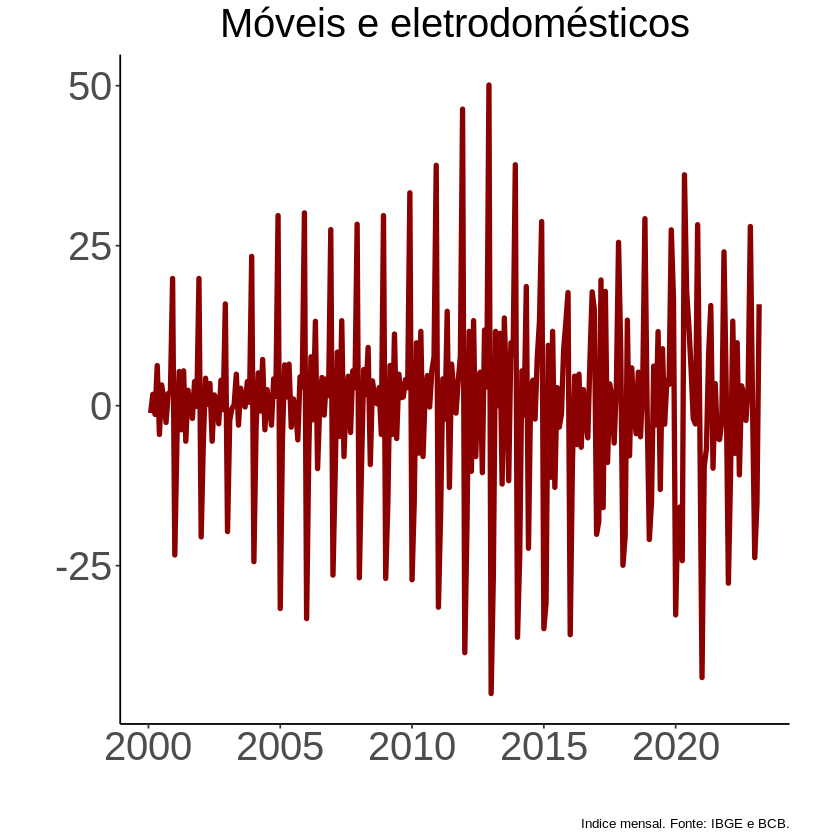

In [ ]:
ggplot( dat2 ) + geom_line(aes(x = mes, y =  dmoveis ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Móveis e eletrodomésticos" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

Faça um gráfico com a evolução mensal da **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


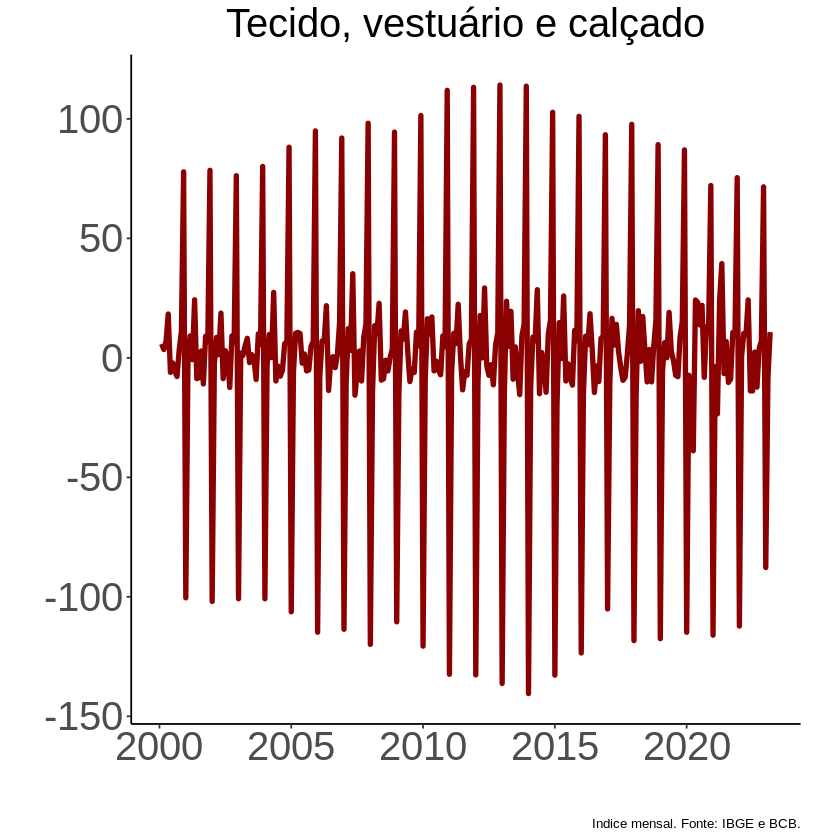

In [ ]:
ggplot( dat2 ) + geom_line(aes(x = mes, y =  dcalcado ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Tecido, vestuário e calçado" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

Faça um gráfico para verificar os padrões sazonais mensais na série da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos

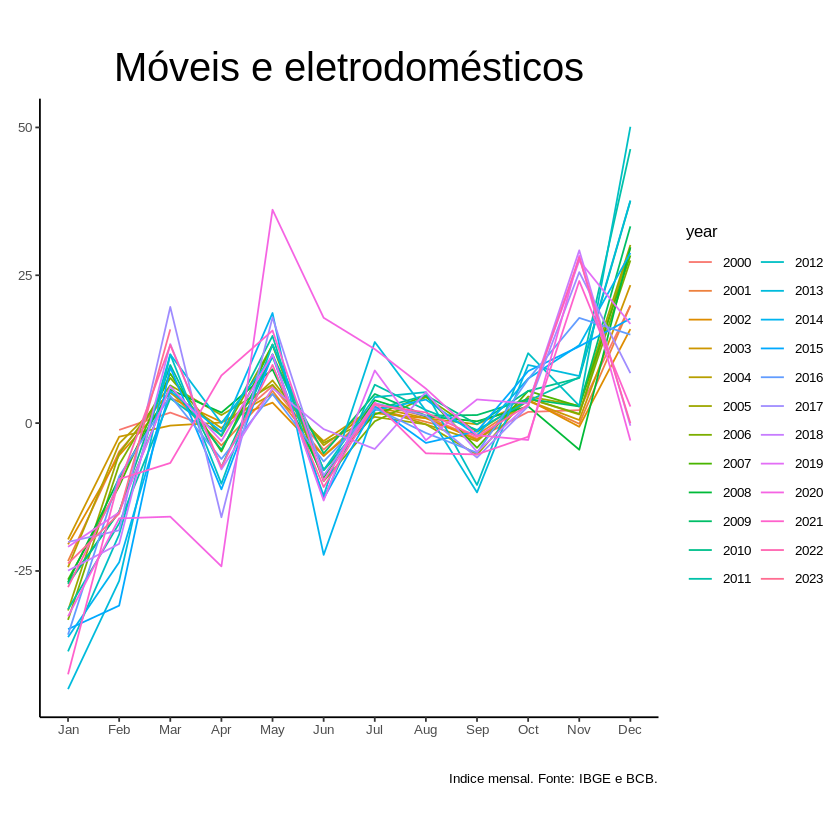

In [ ]:
ggseasonplot( dat2$dmoveis ) +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Móveis e eletrodomésticos" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 16, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

Faça um gráfico para verificar os padrões sazonais mensais na série da **primeira diferença**  do Índice volume de vendas no varejo - Tecido, vestuário e calçado

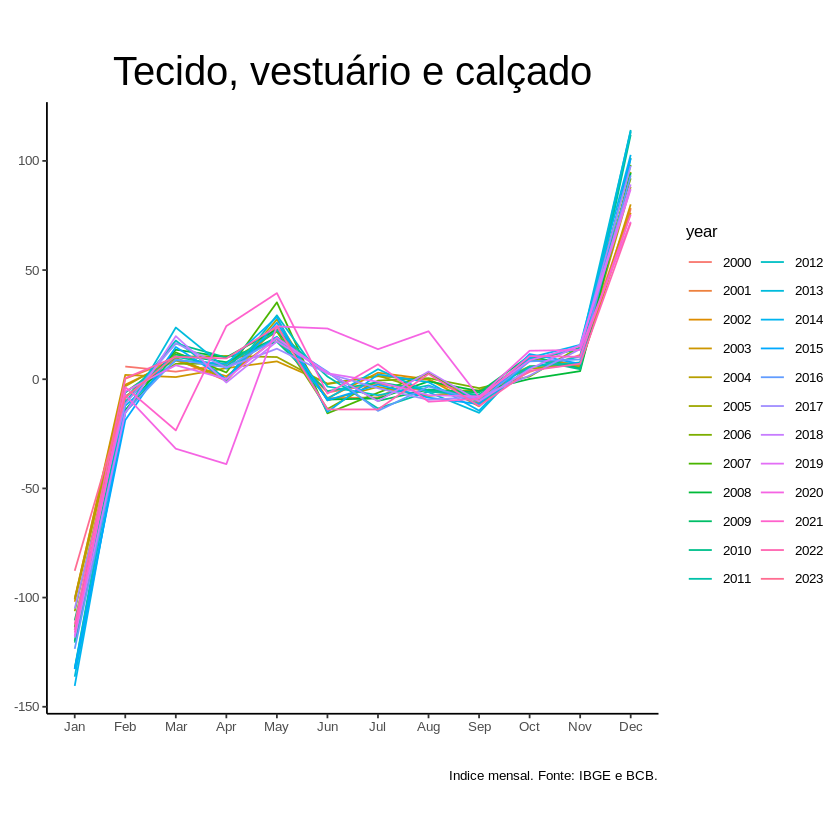

In [ ]:
ggseasonplot( dat2$dcalcado ) +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Tecido, vestuário e calçado" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 16, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

**[Desafio -- Para casa]**

E se quiséssemos verificar o gráfico não em diferença absoluta, mas em taxa de crescimento percentual frente ao mês anterior, como ficaria?

In [ ]:
install.packages( "stats" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [ ]:
library(stats)

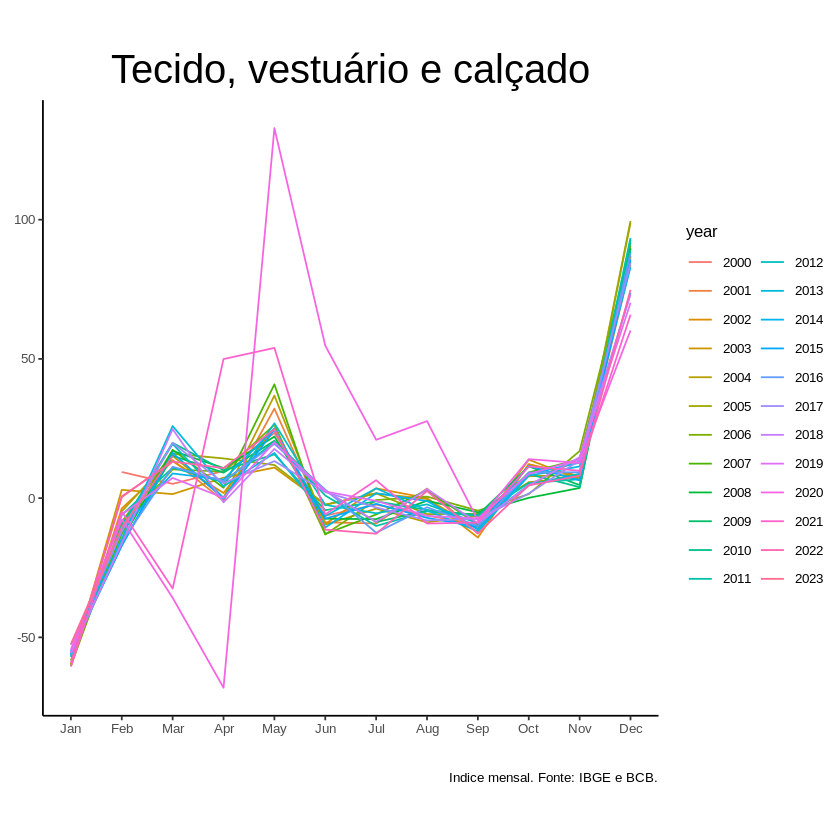

In [ ]:
ggseasonplot( g ) +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Tecido, vestuário e calçado" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 16, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Indice mensal. Fonte: IBGE e BCB.")

Faça um gráfico com a função de autocorrelação da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos

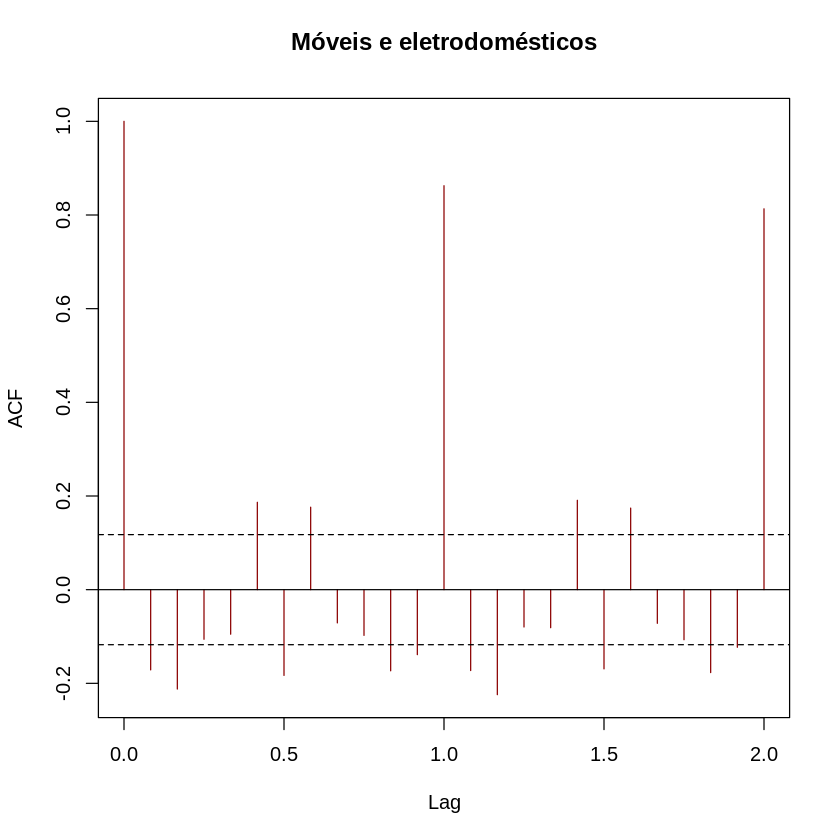

In [ ]:
acf(dat2$dmoveis, main = "Móveis e eletrodomésticos", col = "darkred", ci.col = "black")

Faça um gráfico com a função de autocorrelaçãoda **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado

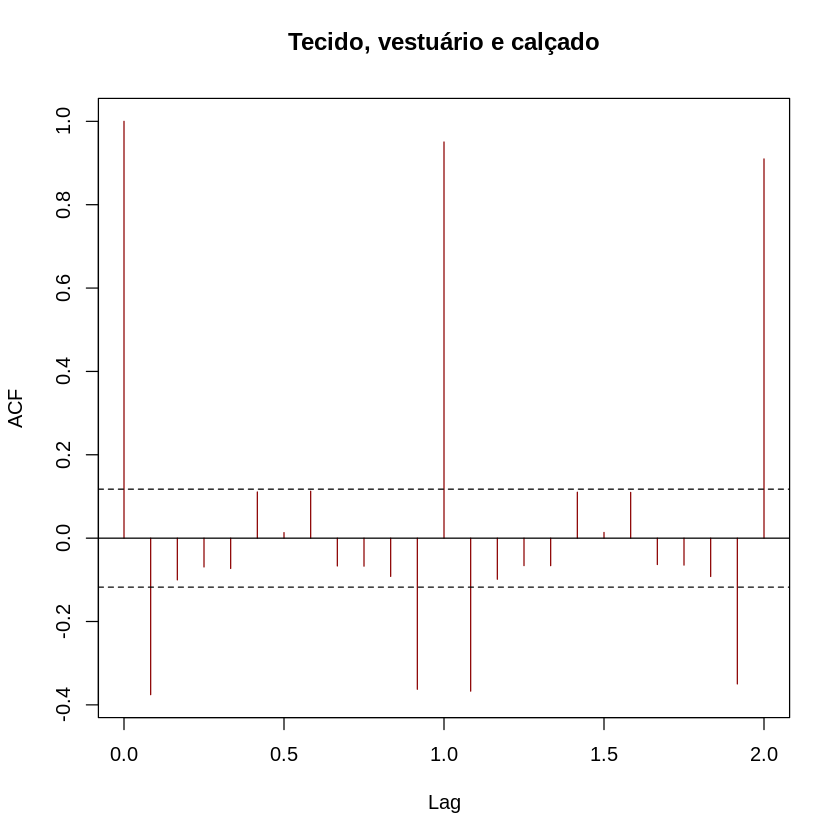

In [ ]:
acf( dat2$dcalcado, main = "Tecido, vestuário e calçado", col = "darkred", ci.col = "black")

Faça um gráfico com a função de autocorrelação parcial da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos

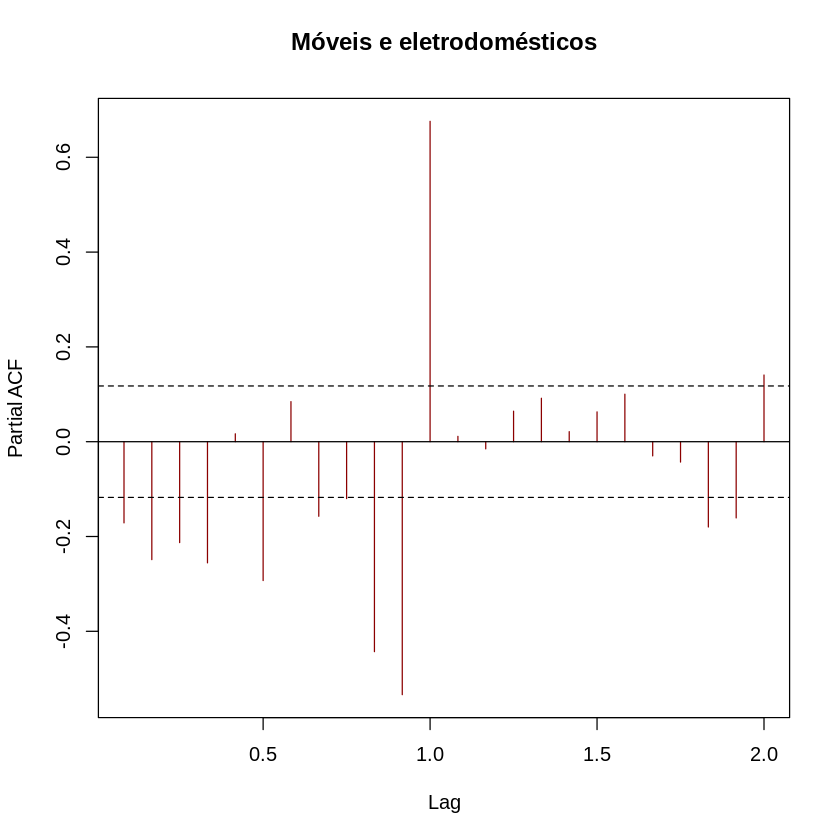

In [ ]:
pacf( dat2$dmoveis, main = "Móveis e eletrodomésticos", col = "darkred", ci.col = "black")

Faça um gráfico com a função de autocorrelação parcial da **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado

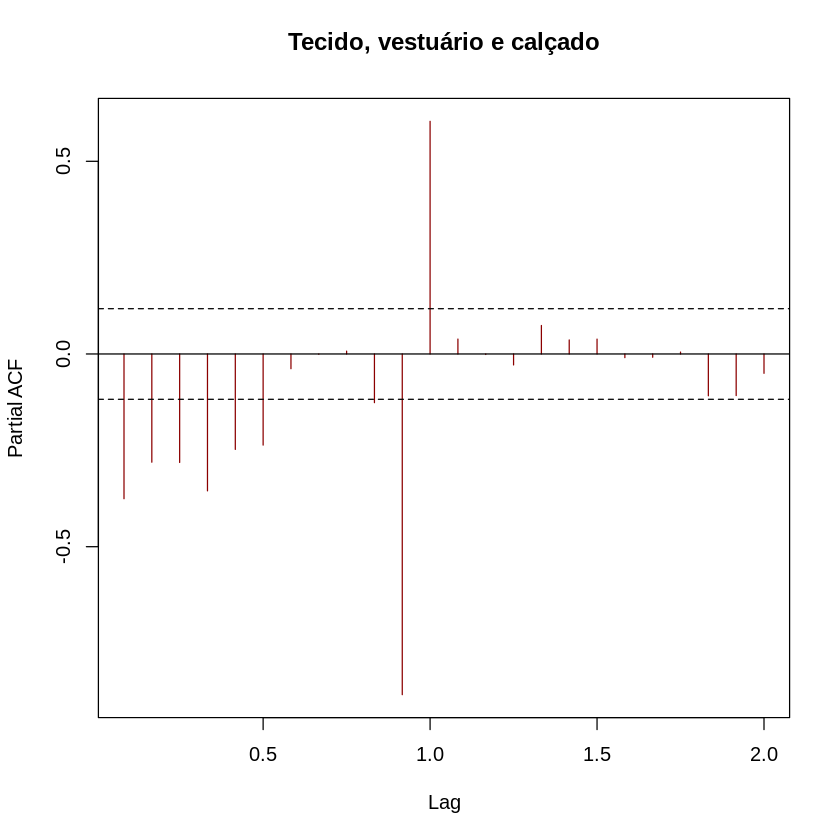

In [ ]:
pacf(dat2$dcalcado, main = "Tecido, vestuário e calçado", col = "darkred", ci.col = "black")

Faça um teste ADF de raiz unitária para a série da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos.

In [ ]:
summary( ur.df( dat2$dmoveis, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.484  -2.735  -0.226   2.769  26.378 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.362653   0.922114   1.478  0.14073    
z.lag.1      -2.167522   0.469171  -4.620 6.15e-06 ***
tt           -0.005665   0.005475  -1.035  0.30179    
z.diff.lag1   0.952908   0.454488   2.097  0.03703 *  
z.diff.lag2   0.723226   0.420361   1.720  0.08658 .  
z.diff.lag3   0.518350   0.384829   1.347  0.17921    
z.diff.lag4   0.294352   0.348949   0.844  0.39973    
z.diff.lag5   0.143016   0.311720   0.459  0.64678    
z.diff.lag6  -0.041694   0.273956  -0.152  0.87916    
z.diff.lag7  -0.188599   0.235121  -0.802  0.42323    
z.diff.lag8  -0.321158   0.197381  -1.627  0.10498   

Faça um teste ADF de raiz unitária para a série da **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado.

In [ ]:
summary( ur.df( dat2$dcalcado, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.978  -4.205  -0.150   4.384  54.831 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.261502   1.163646   1.084 0.279368    
z.lag.1      -3.180866   0.532014  -5.979 7.71e-09 ***
tt           -0.007874   0.007096  -1.110 0.268221    
z.diff.lag1   2.008524   0.514454   3.904 0.000122 ***
z.diff.lag2   1.709642   0.473395   3.611 0.000368 ***
z.diff.lag3   1.413788   0.431984   3.273 0.001215 ** 
z.diff.lag4   1.123710   0.389718   2.883 0.004277 ** 
z.diff.lag5   0.858946   0.346444   2.479 0.013823 *  
z.diff.lag6   0.608110   0.302260   2.012 0.045306 *  
z.diff.lag7   0.368925   0.257678   1.432 0.153470    
z.diff.lag8   0.144077   0.213154   0.676 0.499711   

Agora, faça um teste KPSS de raiz unitária para a série da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos.

In [ ]:
summary( ur.kpss( dat2$dmoveis, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 5 lags. 

Value of test-statistic is: 0.0174 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Faça um teste KPSS de raiz unitária para a série da **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado.

In [ ]:
summary( ur.kpss( dat2$dcalcado, type = "tau",     # média diferente de zero
                               lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 5 lags. 

Value of test-statistic is: 0.0126 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216
